In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, zipfile, gdown

file_id = "1fLKvOc2uohEcdimUemNsL05d4CND5qfq"
zip_path = "/content/water_dataset.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_path, quiet=False)

extract_dir = "/content/water_dataset"
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


Mounted at /content/drive


Downloading...
From (original): https://drive.google.com/uc?id=1fLKvOc2uohEcdimUemNsL05d4CND5qfq
From (redirected): https://drive.google.com/uc?id=1fLKvOc2uohEcdimUemNsL05d4CND5qfq&confirm=t&uuid=953c20a0-4f5d-430b-8405-ed2e3d13cab6
To: /content/water_dataset.zip
100%|██████████| 68.7M/68.7M [00:01<00:00, 39.9MB/s]


In [2]:
import numpy as np
import cv2
import glob

masks_path = sorted(glob.glob(os.path.join(extract_dir, "**", "*.png"), recursive=True))
print(f"Before Cleaning: {len(masks_path)} mask")

kept_masks = []
for mask_path in masks_path:
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        continue

    unique_values = np.unique(mask)
    if len(unique_values) == 1 and (unique_values[0] == 0 or unique_values[0] == 255):
        os.remove(mask_path)
    else:
        kept_masks.append(mask_path)

print(f"After Cleaning {len(kept_masks)} mask")
import shutil

images_dir = "/content/water_dataset/data/images"
labels_dir = "/content/water_dataset/data/labels"

image_files = sorted(glob.glob(os.path.join(images_dir, "*.tif")))
mask_files = sorted(glob.glob(os.path.join(labels_dir, "*.png")))

print(f"{len(image_files)} image")
print(f"{len(mask_files)} label")


image_basenames = set([os.path.splitext(os.path.basename(p))[0] for p in image_files])


valid_masks = []
for mask_path in mask_files:
    mask_name = os.path.splitext(os.path.basename(mask_path))[0]
    matches = [img for img in image_basenames if mask_name.startswith(img)]

    if matches:
        valid_masks.append(mask_path)
    else:
        os.remove(mask_path)

print(f"After deleting: {len(valid_masks)} mask")
image_mask_pairs = []

image_dict = {os.path.splitext(os.path.basename(p))[0]: p for p in image_files}
for mask_path in valid_masks:
    mask_name = os.path.splitext(os.path.basename(mask_path))[0]
    image_prefix = mask_name.split("_")[0]

    if image_prefix in image_dict:
        image_path = image_dict[image_prefix]
        image_mask_pairs.append((image_path, mask_path))

print(f"(image, mask): {len(image_mask_pairs)} pair")
print("Examples: ")
for i in range(min(15, len(image_mask_pairs))):
    print(f"  - {image_mask_pairs[i]}")

Before Cleaning: 456 mask
After Cleaning 411 mask
306 image
411 label
After deleting: 411 mask
(image, mask): 411 pair
Examples: 
  - ('/content/water_dataset/data/images/0.tif', '/content/water_dataset/data/labels/0.png')
  - ('/content/water_dataset/data/images/1.tif', '/content/water_dataset/data/labels/1.png')
  - ('/content/water_dataset/data/images/10.tif', '/content/water_dataset/data/labels/10.png')
  - ('/content/water_dataset/data/images/100.tif', '/content/water_dataset/data/labels/100.png')
  - ('/content/water_dataset/data/images/100.tif', '/content/water_dataset/data/labels/100_184.png')
  - ('/content/water_dataset/data/images/101.tif', '/content/water_dataset/data/labels/101.png')
  - ('/content/water_dataset/data/images/101.tif', '/content/water_dataset/data/labels/101_89.png')
  - ('/content/water_dataset/data/images/102.tif', '/content/water_dataset/data/labels/102.png')
  - ('/content/water_dataset/data/images/102.tif', '/content/water_dataset/data/labels/102_179.pn

🔍 Loading: /content/water_dataset/data/images/0.tif


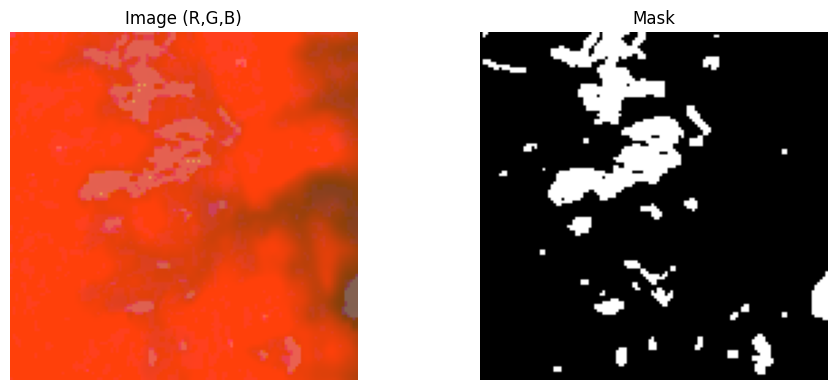

🔍 Loading: /content/water_dataset/data/images/1.tif


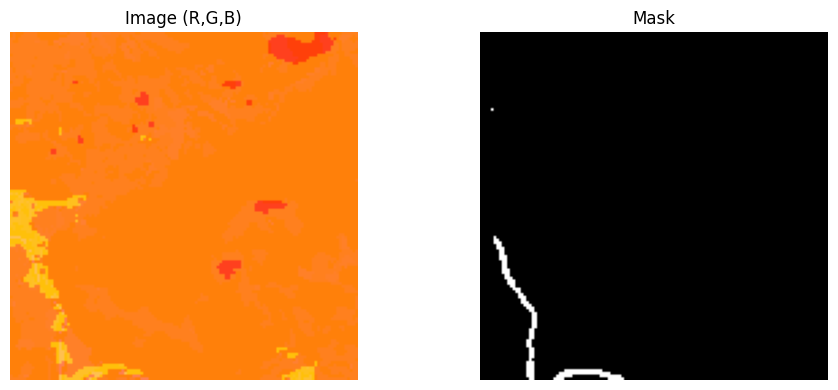

🔍 Loading: /content/water_dataset/data/images/10.tif


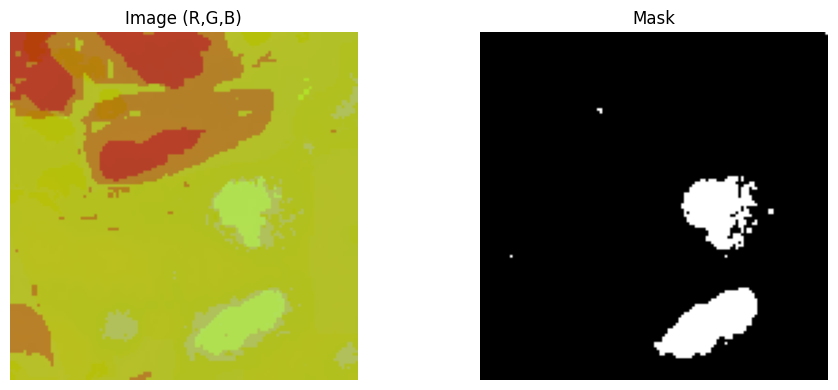

🔍 Loading: /content/water_dataset/data/images/100.tif


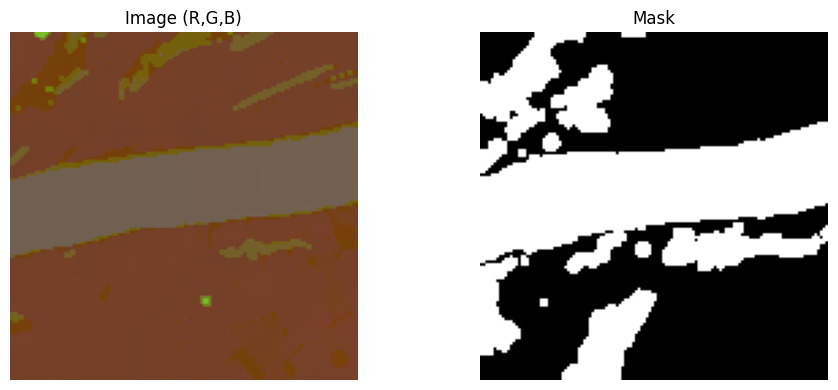

🔍 Loading: /content/water_dataset/data/images/100.tif


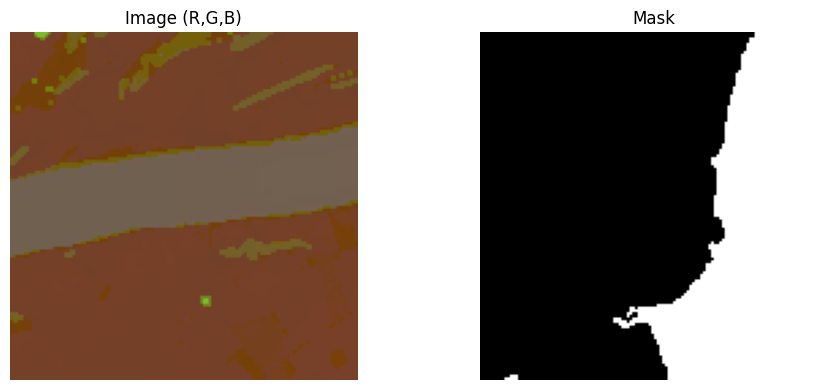

In [3]:
!pip install tifffile
import matplotlib.pyplot as plt
import tifffile as tiff
import cv2
import numpy as np

def show_samples(pairs, num_samples=5):
    for i in range(num_samples):
        image_path, mask_path = pairs[i]
        print(f"🔍 Loading: {image_path}")

        try:
            image = tiff.imread(image_path)  # multi-channel .tif
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        except Exception as e:
            print(f"❌ Error reading image: {e}")
            continue

        if image is None or mask is None:
            print(f"⚠️ Couldn't read image or mask")
            continue


        if image.ndim == 2:
            image_display = np.stack([image] * 3, axis=-1)
        elif image.shape[-1] >= 4:
            image_display = image[:, :, [8,7,10]]
        else:
            image_display = image[:, :, [8,7,10]]

        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.title("Image (R,G,B)")
        plt.imshow(image_display)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title("Mask")
        plt.imshow(mask, cmap='gray')
        plt.axis('off')

        plt.tight_layout()
        plt.show()


show_samples(image_mask_pairs, num_samples=5)

🔍 Loading: /content/water_dataset/data/images/0.tif


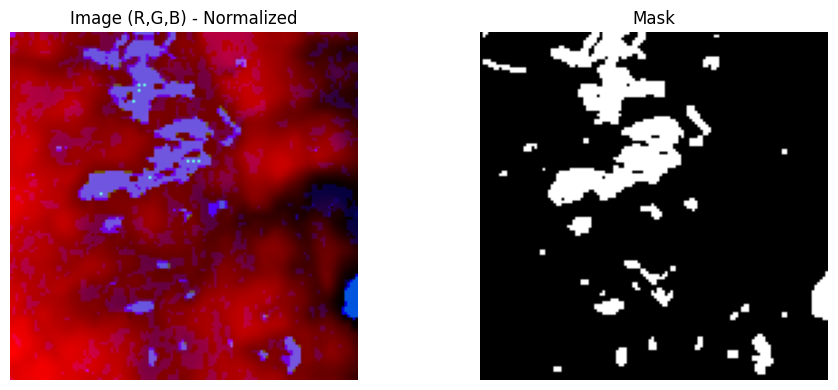

🔍 Loading: /content/water_dataset/data/images/1.tif


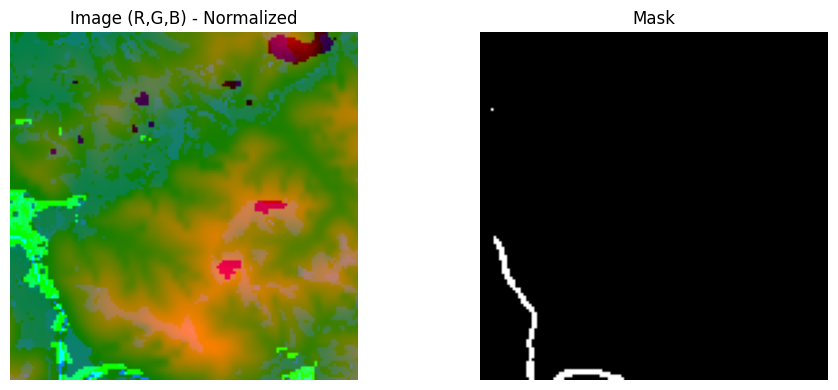

🔍 Loading: /content/water_dataset/data/images/10.tif


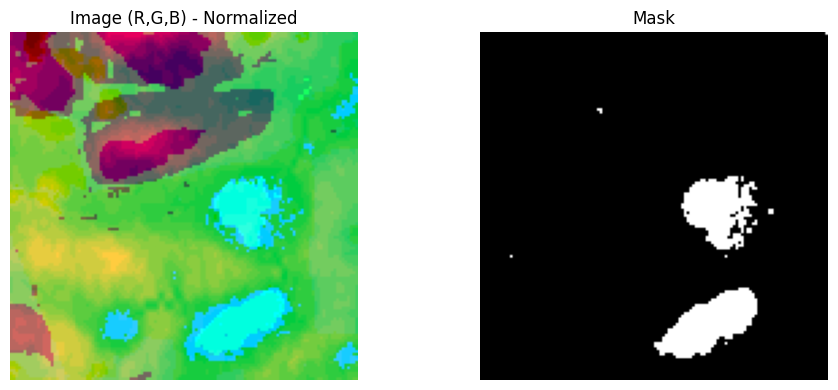

🔍 Loading: /content/water_dataset/data/images/100.tif


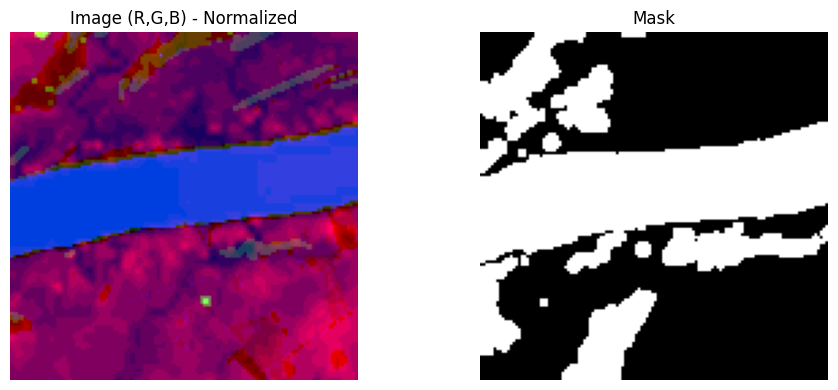

🔍 Loading: /content/water_dataset/data/images/100.tif


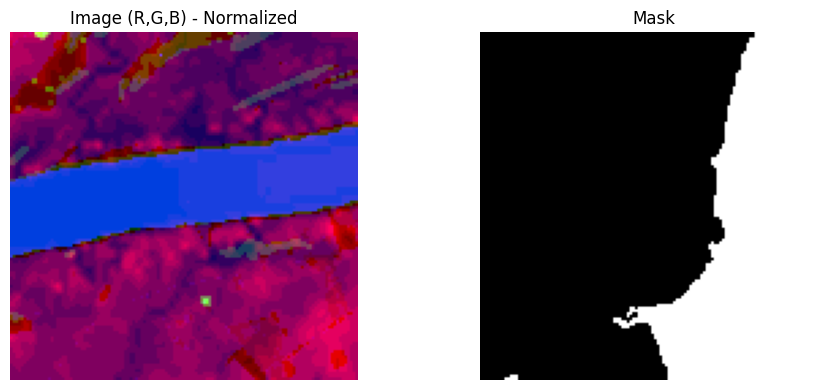

In [4]:
import matplotlib.pyplot as plt
import tifffile as tiff
import cv2
import numpy as np

def normalize_channel(channel):
    min_val = channel.min()
    max_val = channel.max()
    if max_val - min_val == 0:
        return np.zeros_like(channel)
    return (channel - min_val) / (max_val - min_val)

def show_samples(pairs, num_samples=5):
    for i in range(num_samples):
        image_path, mask_path = pairs[i]
        print(f"🔍 Loading: {image_path}")

        try:
            image = tiff.imread(image_path)  # multi-channel .tif
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        except Exception as e:
            print(f"❌ Error reading image: {e}")
            continue

        if image is None or mask is None:
            print(f"⚠️ Couldn't read image or mask")
            continue

        if image.ndim == 2:
            image_display = np.stack([image] * 3, axis=-1)
        elif image.shape[-1] >= 11:
            img_channels = image[:, :, [8, 7, 10]].astype(np.float32)
            for ch in range(3):
                img_channels[:, :, ch] = normalize_channel(img_channels[:, :, ch])
            image_display = img_channels
        else:
            image_display = image[:, :, [8, 7, 10]]

        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.title("Image (R,G,B) - Normalized")
        plt.imshow(image_display)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title("Mask")
        plt.imshow(mask, cmap='gray')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

show_samples(image_mask_pairs, num_samples=5)

In [5]:
import tensorflow as tf

def load_image_mask(image_path, mask_path, img_size=(256, 256)):
    image = tiff.imread(image_path).astype(np.float32)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    image_norm = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.float32)
    for i, ch in enumerate([8,7,10]):
        ch_data = image[:, :, ch]
        ch_min, ch_max = ch_data.min(), ch_data.max()
        denom = ch_max - ch_min
        if denom == 0:
            image_norm[:,:,i] = 0
        else:
            image_norm[:,:,i] = (ch_data - ch_min) / denom

    image_resized = tf.image.resize(image_norm, img_size)
    mask_resized = tf.image.resize(mask[..., np.newaxis], img_size, method='nearest')

    return image_resized, mask_resized

def dataset_generator(pairs, img_size=(256,256)):
    for image_path, mask_path in pairs:
        image, mask = load_image_mask(image_path, mask_path, img_size)
        yield image, mask

from sklearn.model_selection import train_test_split

train_pairs, test_pairs = train_test_split(image_mask_pairs, test_size=0.1, random_state=42)
train_pairs, val_pairs = train_test_split(train_pairs, test_size=0.1, random_state=42)

print(f"Train: {len(train_pairs)}, Val: {len(val_pairs)}, Test: {len(test_pairs)}")

train_dataset = tf.data.Dataset.from_generator(
    lambda: dataset_generator_augmented(train_pairs, img_size=(256,256)),
    output_signature=(
        tf.TensorSpec(shape=(256,256,3), dtype=tf.float32),
        tf.TensorSpec(shape=(256,256,1), dtype=tf.float32)
    )
).batch(16).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_generator(
    lambda: dataset_generator(val_pairs, img_size=(256,256)),
    output_signature=(
        tf.TensorSpec(shape=(256,256,3), dtype=tf.float32),
        tf.TensorSpec(shape=(256,256,1), dtype=tf.float32)
    )
).batch(16).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_generator(
    lambda: dataset_generator(test_pairs, img_size=(256,256)),
    output_signature=(
        tf.TensorSpec(shape=(256,256,3), dtype=tf.float32),
        tf.TensorSpec(shape=(256,256,1), dtype=tf.float32)
    )
).batch(16).prefetch(tf.data.AUTOTUNE)

Train: 332, Val: 37, Test: 42


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def conv_block(inputs, num_filters, dropout=0.0):
    x = layers.Conv2D(num_filters, 3, padding='same', activation=None)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(num_filters, 3, padding='same', activation=None)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    if dropout > 0:
        x = layers.Dropout(dropout)(x)
    return x

def encoder_block(inputs, num_filters, dropout=0.3):
    x = conv_block(inputs, num_filters, dropout=dropout)
    p = layers.MaxPooling2D((2,2))(x)
    p = layers.Dropout(dropout)(p)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = layers.Conv2DTranspose(num_filters, (2,2), strides=2, padding='same')(inputs)
    x = layers.Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = layers.Input(input_shape)

    s1, p1 = encoder_block(inputs, 32, dropout=0.1)
    s2, p2 = encoder_block(p1, 64, dropout=0.1)
    s3, p3 = encoder_block(p2, 128, dropout=0.1)
    s4, p4 = encoder_block(p3, 256, dropout=0.1)

    b1 = conv_block(p4, 512, dropout=0.1)

    d1 = decoder_block(b1, s4, 256)
    d2 = decoder_block(d1, s3, 128)
    d3 = decoder_block(d2, s2, 64)
    d4 = decoder_block(d3, s1, 32)

    outputs = layers.Conv2D(1, 1, padding='same', activation='sigmoid')(d4)

    model = Model(inputs, outputs, name='U-Net')
    return model

# بناء الموديل
unet_model = build_unet((256, 256, 3))
unet_model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      9,248 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ activation_1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     18,496 │ dropout_1[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │     36,928 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128, 128,  │          0 │ activation_3[0][

 Total params: 7,771,873 (29.65 MB)

 Trainable params: 7,765,985 (29.62 MB)

 Non-trainable params: 5,888 (23.00 KB)

In [7]:
import tensorflow.keras.backend as K

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)
!pip install tensorflow-addons
import tensorflow as tf

def augment(image, mask):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_up_down(image)
        mask = tf.image.flip_up_down(mask)

    if tf.random.uniform(()) > 0.5:
        image = tf.image.random_brightness(image, max_delta=0.1)
    if tf.random.uniform(()) > 0.5:
        image = tf.image.random_contrast(image, lower=0.9, upper=1.1)

    return image, mask

def dataset_generator_augmented(pairs, img_size=(256,256)):
    for image_path, mask_path in pairs:
        image, mask = load_image_mask(image_path, mask_path, img_size)
        image, mask = augment(image, mask)
        yield image, mask

train_dataset_aug = tf.data.Dataset.from_generator(
    lambda: dataset_generator_augmented(image_mask_pairs, img_size=(256,256)),
    output_signature=(
        tf.TensorSpec(shape=(256,256,3), dtype=tf.float32),
        tf.TensorSpec(shape=(256,256,1), dtype=tf.float32)
    )
)

train_dataset_aug = train_dataset_aug.batch(16).prefetch(tf.data.AUTOTUNE)
unet_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', dice_coefficient]
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.4
    Uninstalling typeguard-4.4.4:
      Successfully uninstalled typeguard-4.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [8]:
history = unet_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=25,
    verbose=1
)

Epoch 1/25
     21/Unknown 127s 2s/step - accuracy: 0.5236 - dice_coefficient: 0.4780 - loss: 0.7644  

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.5270 - dice_coefficient: 0.4781 - loss: 0.7607 - val_accuracy: 0.3590 - val_dice_coefficient: 0.5109 - val_loss: 4.7326
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 441ms/step - accuracy: 0.7030 - dice_coefficient: 0.4658 - loss: 0.5941 - val_accuracy: 0.6049 - val_dice_coefficient: 0.4189 - val_loss: 0.6727
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 458ms/step - accuracy: 0.7145 - dice_coefficient: 0.4607 - loss: 0.5798 - val_accuracy: 0.7008 - val_dice_coefficient: 0.4007 - val_loss: 0.6462
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 459ms/step - accuracy: 0.7126 - dice_coefficient: 0.4618 - loss: 0.5798 - val_accuracy: 0.7116 - val_dice_coefficient: 0.3998 - val_loss: 0.6348
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 458ms/step - accuracy: 0.7173 - dice_coefficient: 0.4650 - loss: 0.5740 - val_accuracy: 0.6944 - val_dice_coefficient: 0.3962 - val_loss: 0.6319
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 447ms/step - accuracy: 0.7207 - dice_c

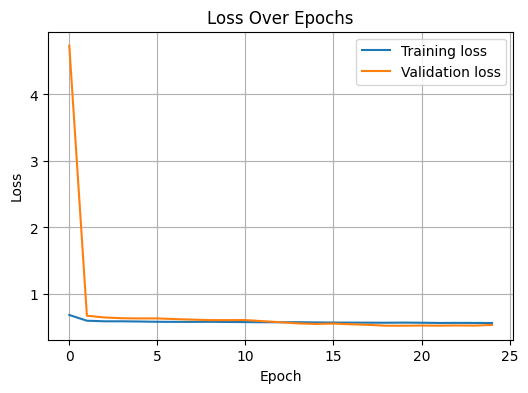

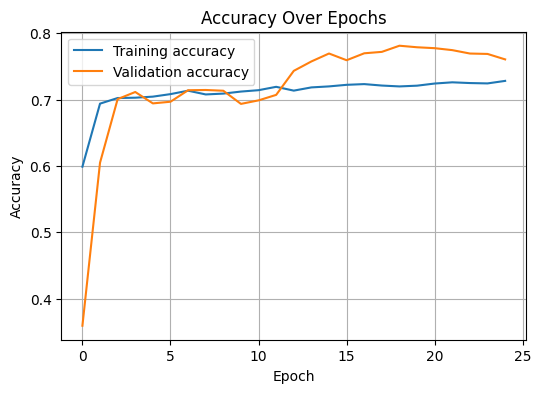

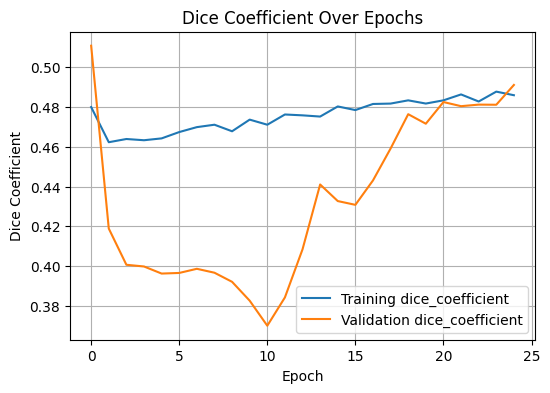

40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 339ms/step - accuracy: 0.6544 - dice_coefficient: 0.4670 - loss: 0.6531


[0.6529167890548706, 0.6538996696472168, 0.46678224205970764]

In [9]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    metrics = ['loss', 'accuracy', 'dice_coefficient']
    for metric in metrics:
        plt.figure(figsize=(6,4))
        plt.plot(history.history[metric], label=f'Training {metric}')
        plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
        plt.xlabel('Epoch')
        plt.ylabel(metric.replace('_', ' ').title())
        plt.title(f'{metric.replace("_", " ").title()} Over Epochs')
        plt.legend()
        plt.grid(True)
        plt.show()

plot_training_history(history)
test_dataset = test_dataset.repeat()
unet_model.evaluate(test_dataset, steps=40)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


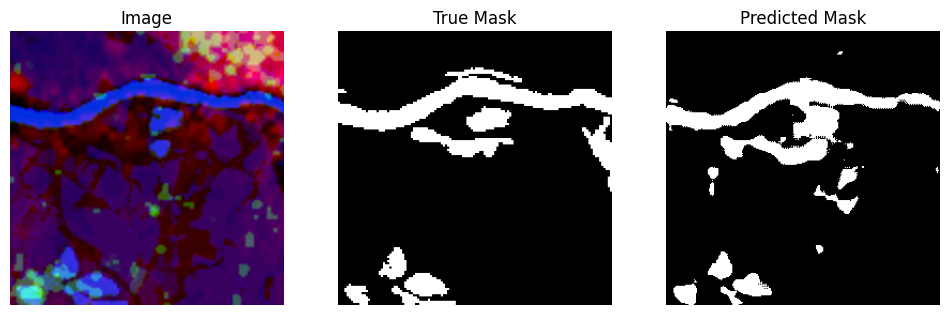

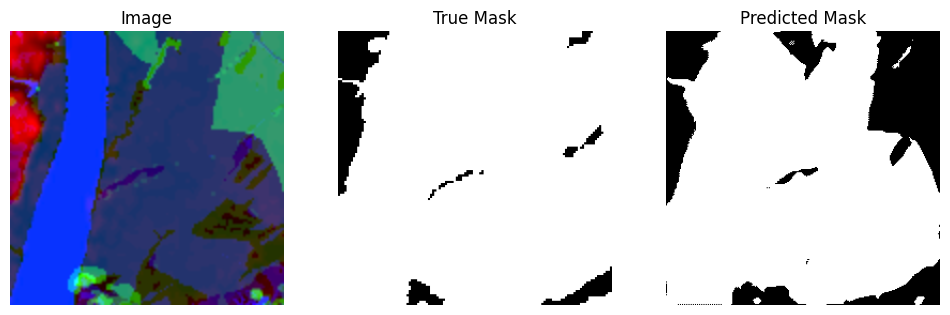


🧪 Evaluating model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


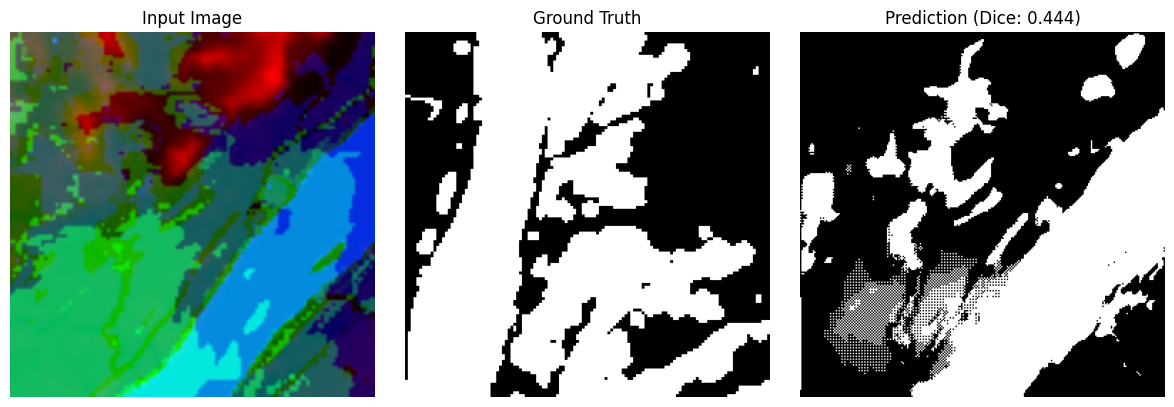

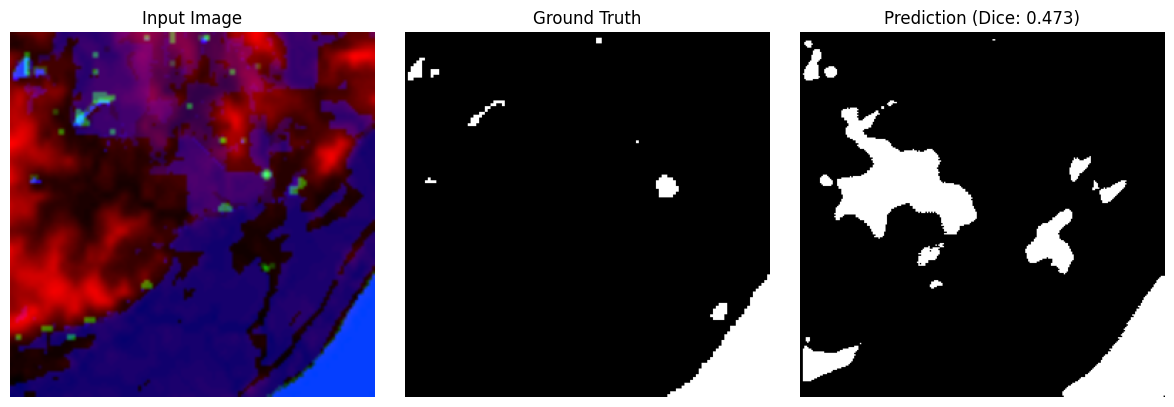

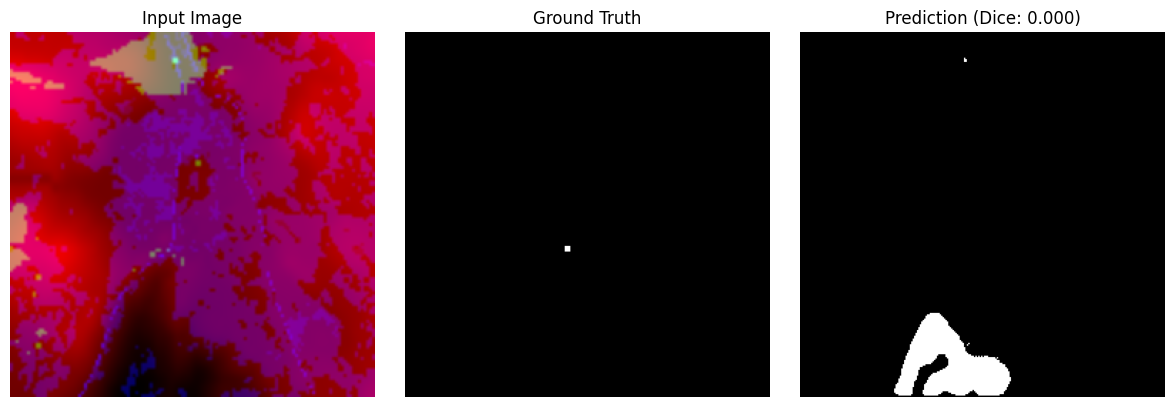

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

🎯 Dice Coefficient Report:
- Average Dice Score: 0.5068
- Above 0.85 (Excellent): 5
- Between 0.7 and 0.85 (Good): 7
- Below 0.6 (Needs Improvement): 20


In [10]:
import numpy as np

def display_predictions(model, dataset, num=5):
    import matplotlib.pyplot as plt

    for images, masks in dataset.take(1):
        preds = model.predict(images)
        preds = (preds > 0.5).astype(np.uint8)

        for i in range(num):
            plt.figure(figsize=(12, 4))

            plt.subplot(1, 3, 1)
            plt.imshow(images[i])
            plt.title('Image')
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(np.squeeze(masks[i]), cmap='gray')
            plt.title('True Mask')
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(np.squeeze(preds[i]), cmap='gray')
            plt.title('Predicted Mask')
            plt.axis('off')

            plt.show()
display_predictions(unet_model, test_dataset, num=2)
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)

def evaluate_model(model, dataset, num_batches=5, show_samples=3):
    dice_scores = []
    sample_count = 0

    print("\n🧪 Evaluating model...")

    for i, (images, masks) in enumerate(dataset.take(num_batches)):
        preds = model.predict(images)
        preds = (preds > 0.5).astype(np.uint8)

        for j in range(len(images)):
            y_true = np.squeeze(masks[j])
            y_pred = np.squeeze(preds[j])
            score = dice_coefficient(y_true, y_pred)
            dice_scores.append(score)

            if sample_count < show_samples:
                fig, axs = plt.subplots(1, 3, figsize=(12, 4))
                axs[0].imshow(np.squeeze(images[j]), cmap='gray')
                axs[0].set_title('Input Image')
                axs[1].imshow(y_true, cmap='gray')
                axs[1].set_title('Ground Truth')
                axs[2].imshow(y_pred, cmap='gray')
                axs[2].set_title(f'Prediction (Dice: {score:.3f})')
                for ax in axs:
                    ax.axis('off')
                plt.tight_layout()
                plt.show()
                sample_count += 1

    dice_scores = np.array(dice_scores)

    print("\n🎯 Dice Coefficient Report:")
    print(f"- Average Dice Score: {dice_scores.mean():.4f}")
    print(f"- Above 0.85 (Excellent): {(dice_scores > 0.85).sum()}")
    print(f"- Between 0.7 and 0.85 (Good): {((dice_scores >= 0.7) & (dice_scores <= 0.85)).sum()}")
    print(f"- Below 0.6 (Needs Improvement): {(dice_scores < 0.6).sum()}")
    return dice_scores
dice_scores = evaluate_model(unet_model, val_dataset, num_batches=5, show_samples=3)
